In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Anzahl Hospitalisierungen nach Impfstoff
hosp = pd.read_csv("COVID19Hosp_vaccpersons.csv", usecols=["date", "geoRegion", "vaccine", "vaccination_status", "sumTotal"])
hosp

,date,vaccine,vaccination_status,sumTotal,geoRegion
0,2021-01-27,unknown,fully_vaccinated,0,CHFL
1,2021-01-28,unknown,fully_vaccinated,0,CHFL
2,2021-01-29,unknown,fully_vaccinated,0,CHFL
3,2021-01-30,unknown,fully_vaccinated,0,CHFL
4,2021-01-31,unknown,fully_vaccinated,0,CHFL
...,...,...,...,...,...
5104,2022-02-19,all,fully_vaccinated_no_booster,3695,CHFL
5105,2022-02-20,all,fully_vaccinated_no_booster,3706,CHFL
5106,2022-02-21,all,fully_vaccinated_no_booster,3714,CHFL
5107,2022-02-22,all,fully_vaccinated_no_booster,3721,CHFL


In [3]:
# Anzahl geimpfte Personen nach Impfstoff
vacc = pd.read_csv("COVID19VaccPersons_vaccine.csv", usecols=["date", "geoRegion", "vaccine", "type", "sumTotal"])
vacc

,date,geoRegion,vaccine,sumTotal,type
0,2020-12-22,AG,johnson_johnson,0,COVID19AtLeastOneDosePersons
1,2020-12-23,AG,johnson_johnson,0,COVID19AtLeastOneDosePersons
2,2020-12-24,AG,johnson_johnson,0,COVID19AtLeastOneDosePersons
3,2020-12-25,AG,johnson_johnson,0,COVID19AtLeastOneDosePersons
4,2020-12-26,AG,johnson_johnson,0,COVID19AtLeastOneDosePersons
...,...,...,...,...,...
165160,2022-02-19,ZH,pfizer_biontech,6978,COVID19PartiallyVaccPersons
165161,2022-02-20,ZH,pfizer_biontech,6977,COVID19PartiallyVaccPersons
165162,2022-02-21,ZH,pfizer_biontech,6599,COVID19PartiallyVaccPersons
165163,2022-02-22,ZH,pfizer_biontech,6315,COVID19PartiallyVaccPersons


In [4]:
# describe vacc where geoRegion ZH
vacc[vacc["geoRegion"] == "ZH"]
# some stats
vacc[vacc["geoRegion"] == "ZH"].describe()

,sumTotal
count,5148.000000
mean,120934.874514
std,210385.420965
min,0.000000
25%,2.000000
50%,7263.000000
75%,174761.250000
max,750550.000000


In [5]:
# Select region CHFL

hosp = hosp[hosp["geoRegion"] == "CHFL"]
vacc = vacc[vacc["geoRegion"] == "CHFL"]

In [6]:
# Check if CHFL is only region

print(hosp["geoRegion"].unique())
print(vacc["geoRegion"].unique())

['CHFL']
['CHFL']


In [7]:
# drop column geoRegion

hosp = hosp.drop("geoRegion", axis = 1)
vacc = vacc.drop("geoRegion", axis = 1)

In [8]:
print(hosp["vaccination_status"].unique())

['fully_vaccinated' 'partially_vaccinated' 'not_vaccinated' 'unknown'
 'fully_vaccinated_first_booster' 'fully_vaccinated_no_booster']


In [9]:
print(vacc["type"].unique())

['COVID19AtLeastOneDosePersons' 'COVID19FirstBoosterPersons'
 'COVID19FullyVaccPersons' 'COVID19PartiallyVaccPersons'
 'COVID19NotVaccPersons']


In [10]:
# replace vaccine type

vacc = vacc.replace({"type": {
    "COVID19AtLeastOneDosePersons": "unknown",
    "COVID19FirstBoosterPersons": "fully_vaccinated_first_booster",
    "COVID19FullyVaccPersons": "fully_vaccinated",
    "COVID19PartiallyVaccPersons": "partially_vaccinated",
    "COVID19NotVaccPersons": "not_vaccinated"
}})

In [11]:
# rename column name
vacc = vacc.rename(columns = {"type": "vaccination_status"})

In [12]:
# remove rows with "unknown" status
vacc = vacc[vacc["vaccination_status"] != "unknown"]
hosp = hosp[hosp["vaccination_status"] != "unknown"]

In [13]:
# Check if status "unknown" was removed
print(vacc["vaccination_status"].unique())
print(hosp["vaccination_status"].unique())

['fully_vaccinated_first_booster' 'fully_vaccinated'
 'partially_vaccinated' 'not_vaccinated']
['fully_vaccinated' 'partially_vaccinated' 'not_vaccinated'
 'fully_vaccinated_first_booster' 'fully_vaccinated_no_booster']


In [14]:
# check if vaccinations are named identically
print(vacc["vaccine"].unique())
print(hosp["vaccine"].unique())

['johnson_johnson' 'moderna' 'pfizer_biontech' nan]
['unknown' 'moderna' 'pfizer_biontech' 'johnson_johnson' 'all']


In [15]:
# replace rows with "unkown" & "all" vaccinations to nan
hosp = hosp.replace({"vaccine": {"unknown": np.nan, "all": np.nan}})

In [16]:
# check if vaccinations were changed to nan
print(vacc["vaccine"].unique())
print(hosp["vaccine"].unique())

['johnson_johnson' 'moderna' 'pfizer_biontech' nan]
[nan 'moderna' 'pfizer_biontech' 'johnson_johnson']


In [17]:
# drop all nan vaccination values
vacc = vacc[vacc["vaccine"].notna()]
hosp = hosp[hosp["vaccine"].notna()]

In [18]:
# check if vaccinations were changed to nan
print(vacc["vaccine"].unique())
print(hosp["vaccine"].unique())

['johnson_johnson' 'moderna' 'pfizer_biontech']
['moderna' 'pfizer_biontech' 'johnson_johnson']


In [19]:
vacc.head()

,date,vaccine,sumTotal,vaccination_status
41613,2020-12-22,johnson_johnson,0,fully_vaccinated_first_booster
41614,2020-12-23,johnson_johnson,0,fully_vaccinated_first_booster
41615,2020-12-24,johnson_johnson,0,fully_vaccinated_first_booster
41616,2020-12-25,johnson_johnson,0,fully_vaccinated_first_booster
41617,2020-12-26,johnson_johnson,0,fully_vaccinated_first_booster


In [20]:
hosp.head()

,date,vaccine,vaccination_status,sumTotal
393,2021-01-27,moderna,fully_vaccinated,0
394,2021-01-28,moderna,fully_vaccinated,0
395,2021-01-29,moderna,fully_vaccinated,0
396,2021-01-30,moderna,fully_vaccinated,0
397,2021-01-31,moderna,fully_vaccinated,0


In [21]:
# left join dataframes
df = pd.merge(vacc, hosp, how = "left")

In [22]:
df

,date,vaccine,sumTotal,vaccination_status
0,2020-12-22,johnson_johnson,0,fully_vaccinated_first_booster
1,2020-12-23,johnson_johnson,0,fully_vaccinated_first_booster
2,2020-12-24,johnson_johnson,0,fully_vaccinated_first_booster
3,2020-12-25,johnson_johnson,0,fully_vaccinated_first_booster
4,2020-12-26,johnson_johnson,0,fully_vaccinated_first_booster
...,...,...,...,...
3856,2022-02-19,pfizer_biontech,46729,partially_vaccinated
3857,2022-02-20,pfizer_biontech,45743,partially_vaccinated
3858,2022-02-21,pfizer_biontech,44849,partially_vaccinated
3859,2022-02-22,pfizer_biontech,44001,partially_vaccinated


In [23]:
# replace missing values with 0
df["sumTotal"] = df["sumTotal"].fillna(0)

In [24]:
# check if there are no missing values
print(df["sumTotal"].isna().sum())

0


In [25]:
# only fully vaccinated
df_vacc = df[df["vaccination_status"] == "fully_vaccinated"]
df_vacc

,date,vaccine,sumTotal,vaccination_status
429,2020-12-22,johnson_johnson,0,fully_vaccinated
430,2020-12-23,johnson_johnson,0,fully_vaccinated
431,2020-12-24,johnson_johnson,0,fully_vaccinated
432,2020-12-25,johnson_johnson,0,fully_vaccinated
433,2020-12-26,johnson_johnson,0,fully_vaccinated
...,...,...,...,...
3427,2022-02-19,pfizer_biontech,2117107,fully_vaccinated
3428,2022-02-20,pfizer_biontech,2118122,fully_vaccinated
3429,2022-02-21,pfizer_biontech,2119186,fully_vaccinated
3430,2022-02-22,pfizer_biontech,2120146,fully_vaccinated


In [26]:
df_vacc = df.groupby(["date", "vaccine"])["sumTotal"].sum().reset_index()
df_vacc

,date,vaccine,sumTotal
0,2020-12-22,johnson_johnson,0
1,2020-12-22,moderna,0
2,2020-12-22,pfizer_biontech,2
3,2020-12-23,johnson_johnson,0
4,2020-12-23,moderna,1
...,...,...,...
1282,2022-02-22,moderna,6008773
1283,2022-02-22,pfizer_biontech,3637122
1284,2022-02-23,johnson_johnson,58422
1285,2022-02-23,moderna,6010613


In [27]:
# date to pd.todatetime
df_vacc["date"] = pd.to_datetime(df_vacc["date"])

In [28]:
df_vacc

,date,vaccine,sumTotal
0,2020-12-22,johnson_johnson,0
1,2020-12-22,moderna,0
2,2020-12-22,pfizer_biontech,2
3,2020-12-23,johnson_johnson,0
4,2020-12-23,moderna,1
...,...,...,...
1282,2022-02-22,moderna,6008773
1283,2022-02-22,pfizer_biontech,3637122
1284,2022-02-23,johnson_johnson,58422
1285,2022-02-23,moderna,6010613


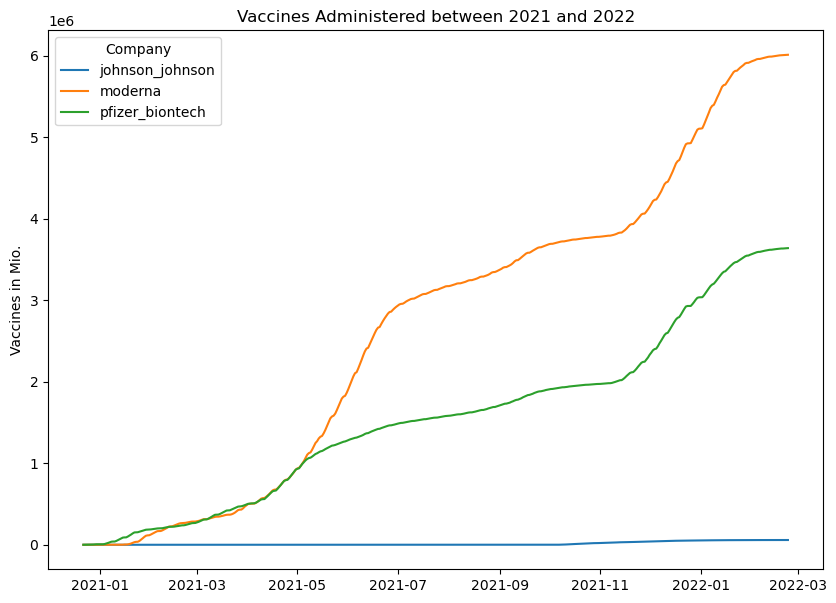

In [29]:
fig = plt.figure(figsize=(10,7))
sns.lineplot(data = df_vacc, x = "date", y = "sumTotal", hue = "vaccine")
# change y description
plt.ylabel("Vaccines in Mio.")
# dont show x axis
plt.xlabel("")
# add company instead vaccine at legend box
plt.legend(title = "Company")
plt.title("Vaccines Administered between 2021 and 2022")
plt.show()

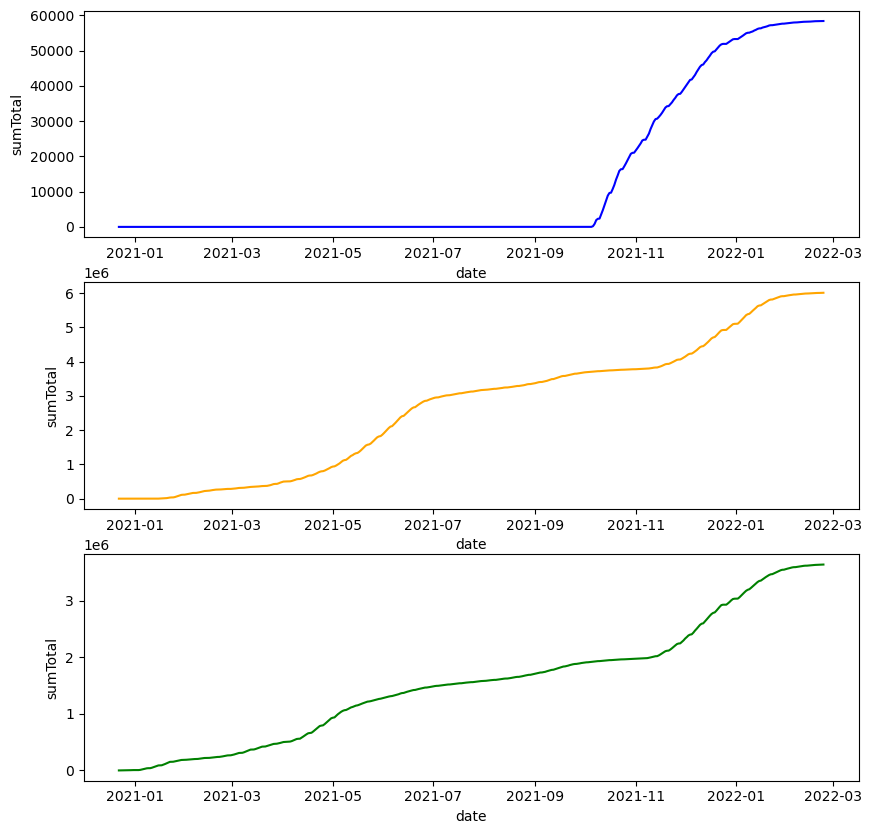

In [30]:
# create 3 different plot for each vaccine
# choose different colors
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
sns.lineplot(data = df_vacc[df_vacc["vaccine"] == "johnson_johnson"], x = "date", y = "sumTotal", ax = ax[0], color = "blue")
sns.lineplot(data = df_vacc[df_vacc["vaccine"] == "moderna"], x = "date", y = "sumTotal", ax = ax[1], color = "orange")
sns.lineplot(data = df_vacc[df_vacc["vaccine"] == "pfizer_biontech"], x = "date", y = "sumTotal", ax = ax[2], color = "green")
plt.show()

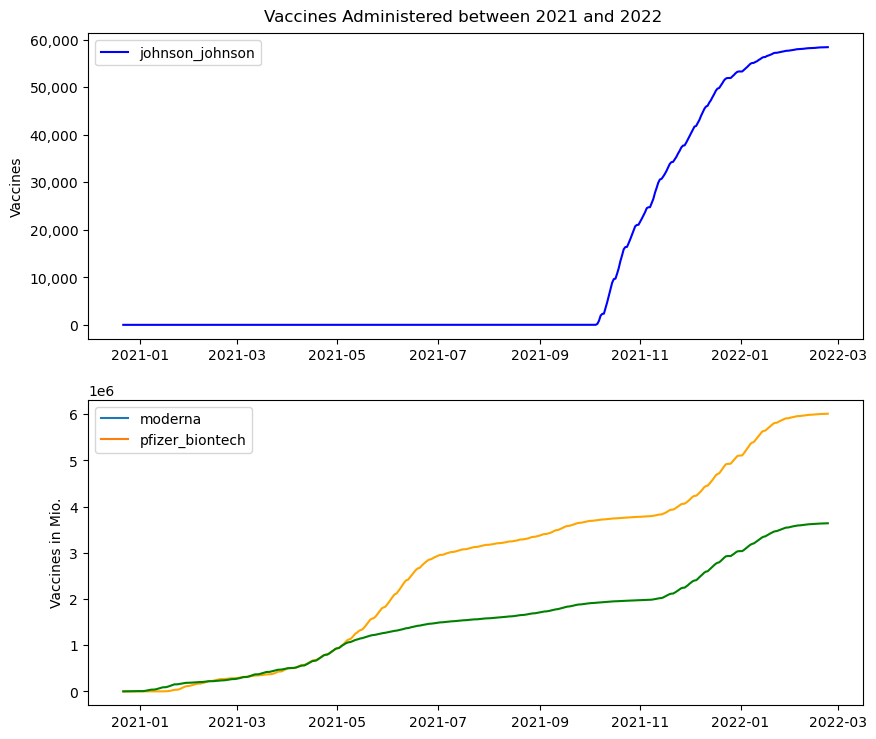

In [36]:
# plot df where vaccine == moderna and vaccine == johnson_johnson
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
# set title above first plot
fig.suptitle("Vaccines Administered between 2021 and 2022")
# reduce distance between title and rest
plt.subplots_adjust(top=0.95)
ax[0] = sns.lineplot(data = df_vacc[df_vacc["vaccine"] == "johnson_johnson"], x = "date", y = "sumTotal", ax = ax[0], color = "blue")
# add legend label at the end of curve
ax[0].legend(labels = ["johnson_johnson"], loc = "upper left")
# rename y label
ax[0].set_ylabel("Vaccines")
ax[1].set_ylabel("Vaccines in Mio.")
ax[1] = sns.lineplot(data = df_vacc[(df_vacc["vaccine"] == "moderna") | (df_vacc["vaccine"] == "pfizer_biontech")], x = "date", y = "sumTotal", hue = "vaccine")
# change color for ax[1]
ax[1].lines[0].set_color("orange")
ax[1].lines[1].set_color("green")
# change color of legend bar
ax[1].legend(labels = ["moderna", "pfizer_biontech"], loc = "upper left")
# remove vaccine from legend
ax[1].legend(title = "")
# remove date label
ax[0].set_xlabel("")
ax[1].set_xlabel("")
# set scientific scale for y axis
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()